## Heart Failure

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

### Import Dataset

In [3]:
df = pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

### Data Inspection

In [4]:
df.shape

(918, 12)

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

### Exploratory Data Analysis

#### 1. Target variable distribution: This bar chart shows how many patients do and do not have heart disease. It's useful for determining whether the data set is balanced between the two classes.

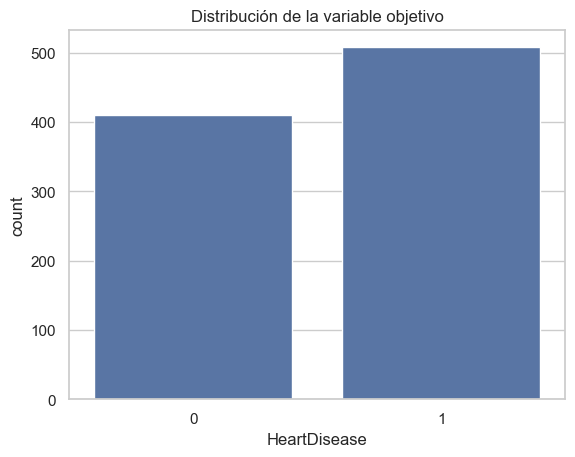

In [8]:
sns.countplot(data=df, x='HeartDisease')
plt.title("Distribución de la variable objetivo")
plt.show()

#### 2. Age distribution: This graph shows the age distribution in the dataset. The KDE (density estimate) curve shows how the most common patient ages cluster.

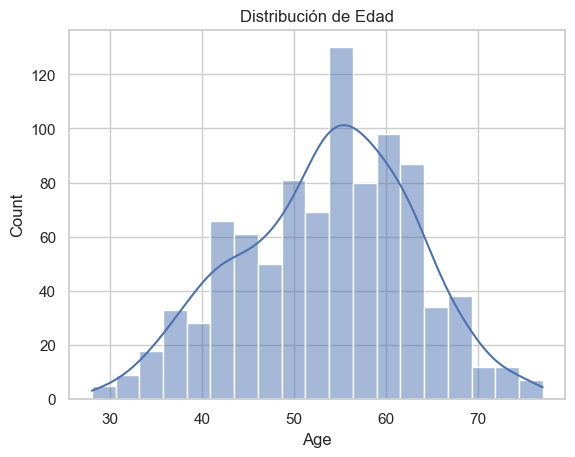

In [9]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribución de Edad")
plt.show()

#### 3. Boxplot for cholesterol (Outlier detection): This boxplot allows you to identify cholesterol distribution and potential outliers. Points outside the whiskers represent outliers that could affect the analysis.

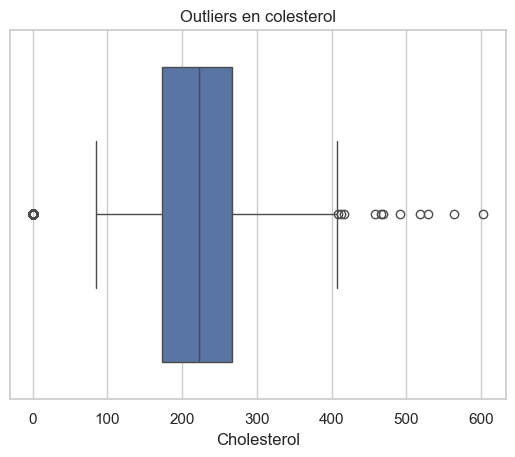

In [10]:
sns.boxplot(x='Cholesterol', data=df)
plt.title("Outliers en colesterol")
plt.show()

#### 4. Violin Plot: This graph shows the distribution of cholesterol levels according to the presence or absence of heart disease. It combines information from a boxplot with the density of the data, facilitating comparisons between the two classes.

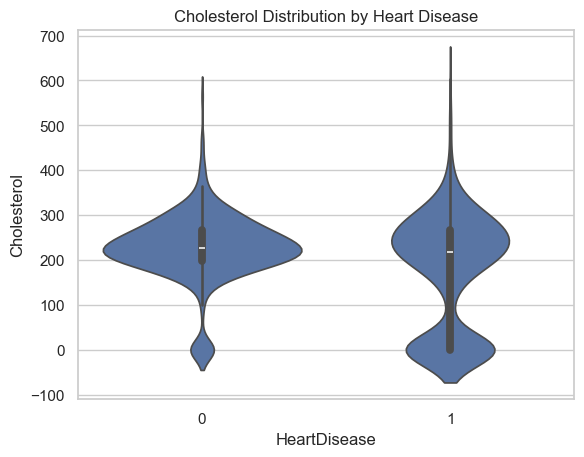

In [11]:
sns.violinplot(data=df, x="HeartDisease", y="Cholesterol")
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()


#### 5.KDE Plot (Kernel Density Estimation): This graph compares the distribution of maximum heart rate (MaxHR) between patients with and without heart disease. The curves allow for smooth and continuous visualization of differences in trends within each group.

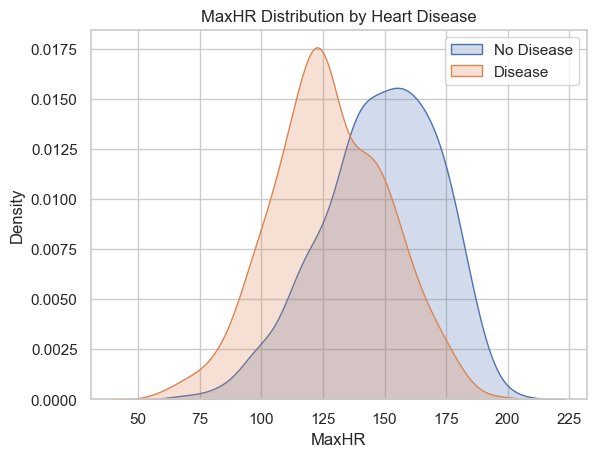

In [12]:
sns.kdeplot(data=df[df['HeartDisease'] == 0]['MaxHR'], label="No Disease", fill=True)
sns.kdeplot(data=df[df['HeartDisease'] == 1]['MaxHR'], label="Disease", fill=True)
plt.title("MaxHR Distribution by Heart Disease")
plt.legend()
plt.show()


#### 6. Pair Plot: This graph shows the relationships between pairs of numerical variables, differentiated by heart disease class. It is useful for identifying patterns, correlations, and possible class separations.

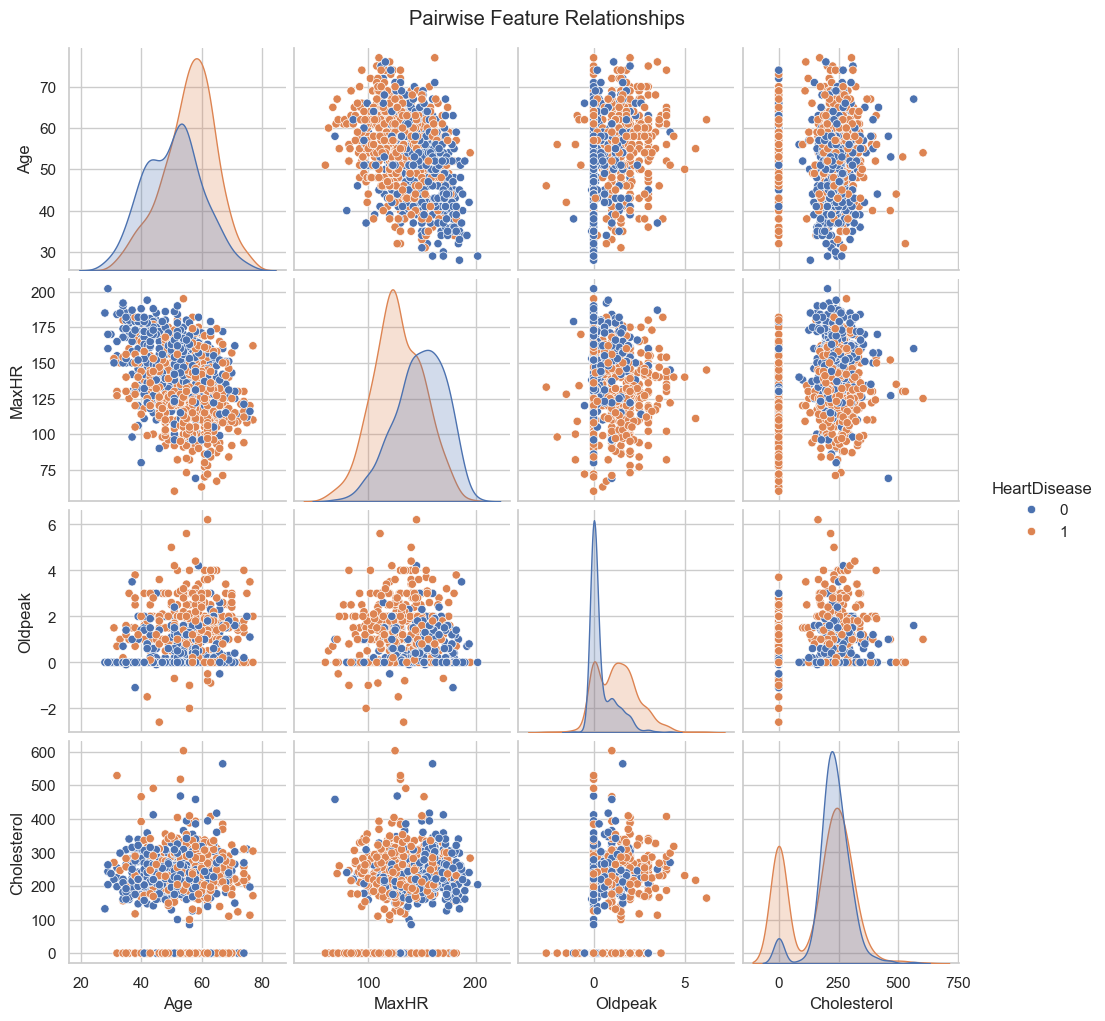

In [13]:
selected = ['Age', 'MaxHR', 'Oldpeak', 'Cholesterol', 'HeartDisease']
sns.pairplot(df[selected], hue='HeartDisease')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

##### This scatter plot shows the relationship between age and maximum heart rate, differentiating by the presence of disease. It is useful for detecting possible clusters, trends, or separations between classes.

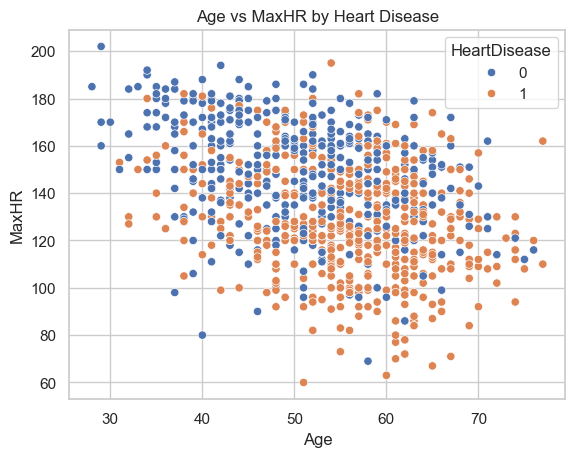

In [14]:
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease')
plt.title("Age vs MaxHR by Heart Disease")
plt.show() 

### 7. Function for bivariate analysis (histogram + KDE): This function generates two side-by-side graphs for a variable: a histogram and a density curve (KDE), both separated by heart disease class. It allows you to visualize and compare how that variable is distributed between patients with and without disease.

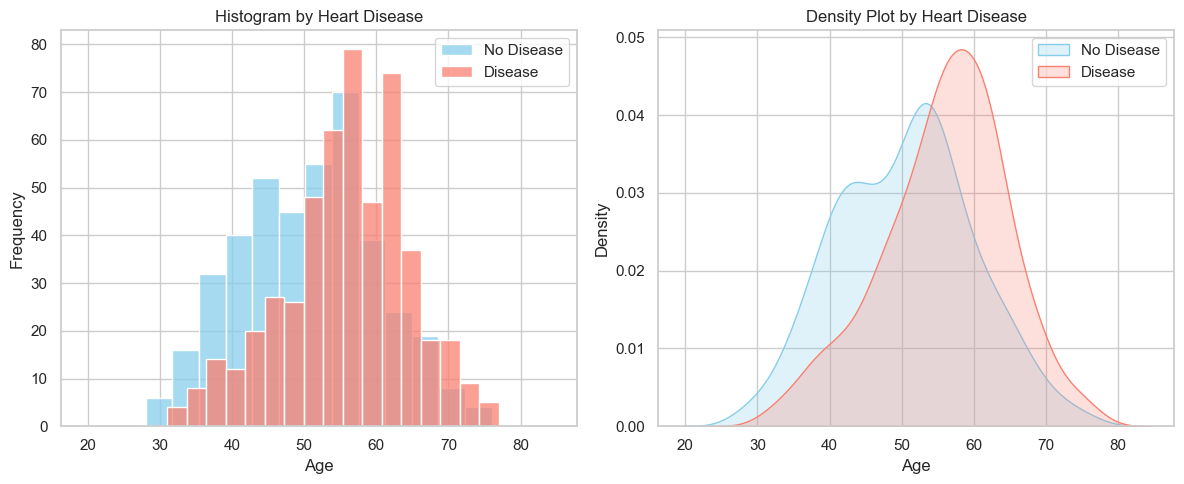

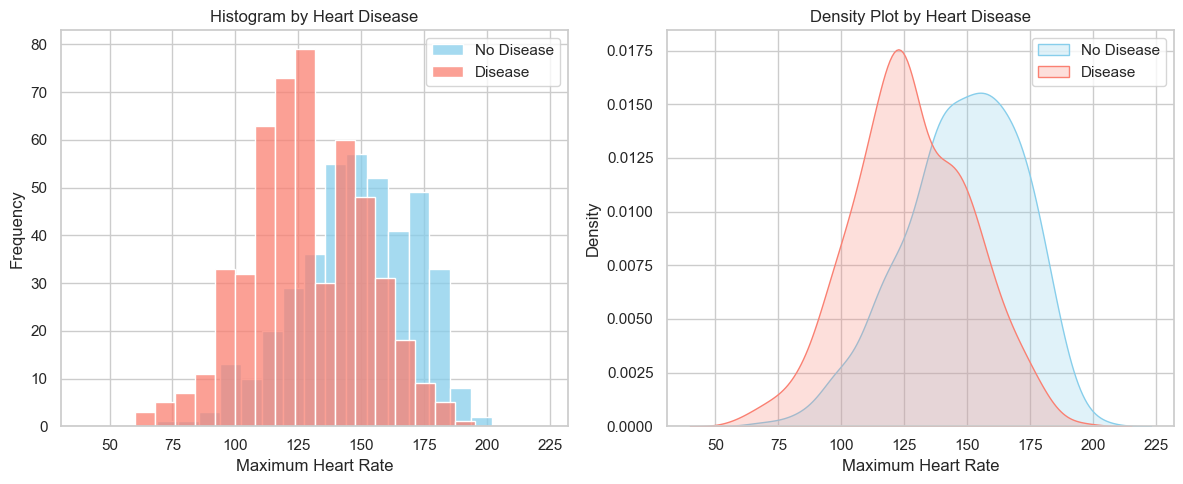

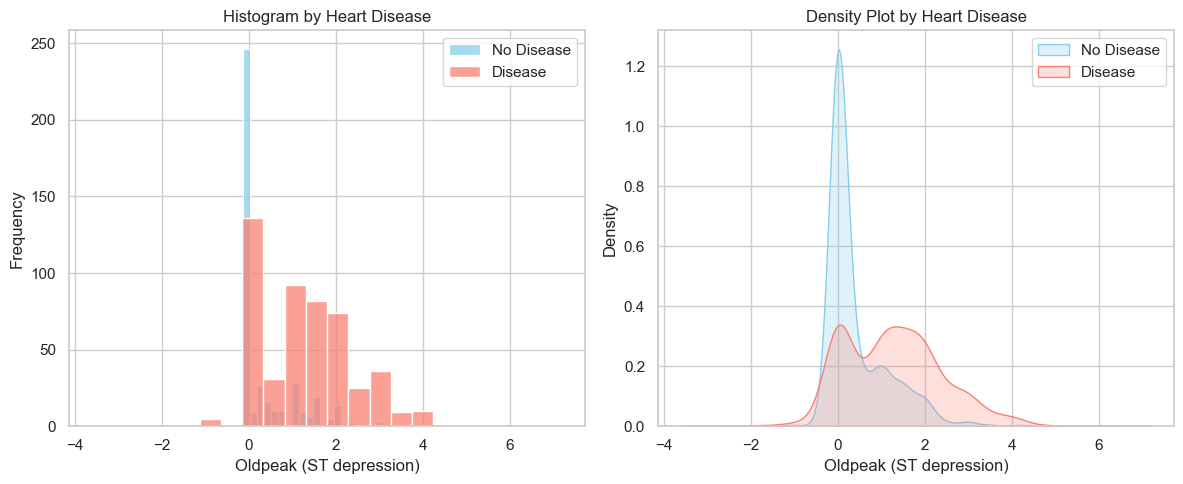

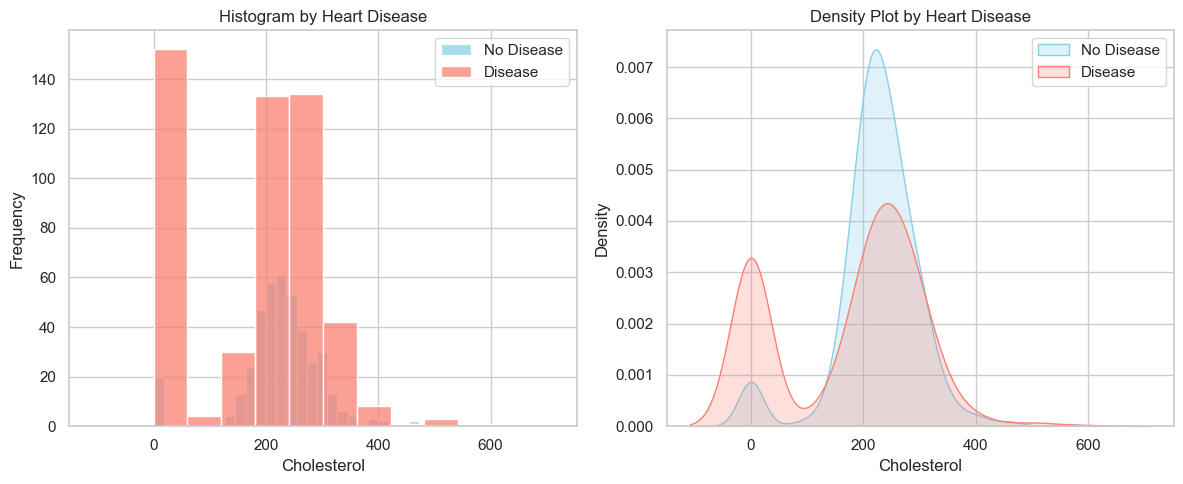

In [15]:
def bivariable_analysis(var, var_title):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True)

    # Histogram by HeartDisease
    sns.histplot(data=df[df['HeartDisease'] == 0], x=var, label='No Disease', ax=ax[0], color='skyblue')
    sns.histplot(data=df[df['HeartDisease'] == 1], x=var, label='Disease', ax=ax[0], color='salmon')
    ax[0].set_xlabel(var_title)
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram by Heart Disease')
    ax[0].legend()

    # KDE Plot by HeartDisease
    sns.kdeplot(data=df[df['HeartDisease'] == 0], x=var, label='No Disease', fill=True, ax=ax[1], color='skyblue')
    sns.kdeplot(data=df[df['HeartDisease'] == 1], x=var, label='Disease', fill=True, ax=ax[1], color='salmon')
    ax[1].set_xlabel(var_title)
    ax[1].set_title('Density Plot by Heart Disease')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

bivariable_analysis('Age', 'Age')
bivariable_analysis('MaxHR', 'Maximum Heart Rate')
bivariable_analysis('Oldpeak', 'Oldpeak (ST depression)')
bivariable_analysis('Cholesterol', 'Cholesterol')




### 8. Boxplot de RestingBP: This graph shows the distribution of resting blood pressure (RBP) by heart disease class. It allows for comparing medians and ranges and detecting potential outliers between the two groups.

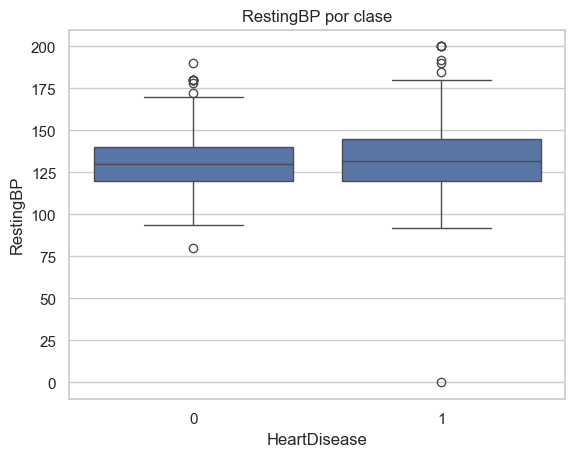

In [16]:
sns.boxplot(data=df, x='HeartDisease', y='RestingBP')
plt.title("RestingBP por clase")
plt.show()

### Extra. 3D scatter plot: This three-dimensional graph visualizes the joint relationship between age, maximum heart rate, and peak age. Color indicates the presence or absence of heart disease, making it easier to observe patterns or groupings among classes.

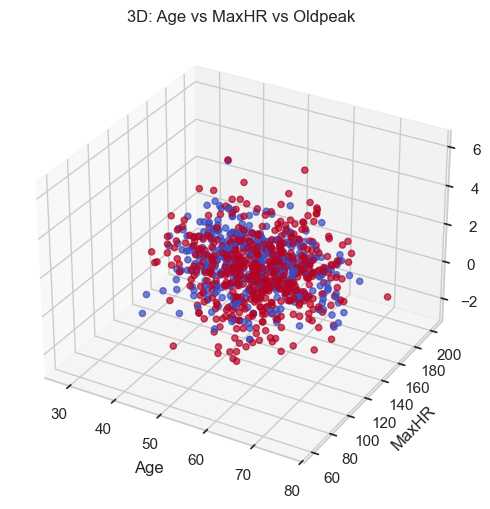

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['MaxHR'], df['Oldpeak'], c=df['HeartDisease'], cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('MaxHR')
ax.set_zlabel('Oldpeak')
ax.set_title('3D: Age vs MaxHR vs Oldpeak')
plt.show()


### Feature Transformation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

get_dummies()

What it does Why it's needed? get_dummies() Encodes text into numbers
Why is it necessary? Because models don't understand text

In [26]:
df_encoded = pd.get_dummies(df, drop_first=True)

separate x and y

What it does Why it's needed? Define predictors and objective
Why is it necessary? To train models correctly

In [27]:
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

StandardScaler()

What it does Why it's needed? Normalize the data
Why is it necessary? To improve model performance

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Modeling 

Model 1: Logistic Regression

We import the logistic regression model and the metrics to evaluate how well the model performs.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

We split the data into training (80%) and testing (20%) to train the model and then check how it performs.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

We create the logistic regression model and train it using the training data.

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

We use the trained model to make predictions on the test data.

In [40]:
y_pred_lr = lr.predict(X_test)

We store the model results in a dictionary to see how well it predicts: accuracy, precision, recall, F1 score, and the confusion matrix.

In [34]:
lr_results = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1 Score': f1_score(y_test, y_pred_lr),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lr)
}

lr_results

{'Model': 'Logistic Regression',
 'Accuracy': 0.8532608695652174,
 'Precision': 0.9,
 'Recall': 0.8411214953271028,
 'F1 Score': 0.8695652173913043,
 'Confusion Matrix': array([[67, 10],
        [17, 90]])}

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

This block visually displays the confusion matrix for the logistic regression model. It's useful because it shows how often the model correctly or incorrectly predicted whether a patient has heart disease or not.
We include it to better visualize the model’s performance, instead of just looking at the raw numbers.

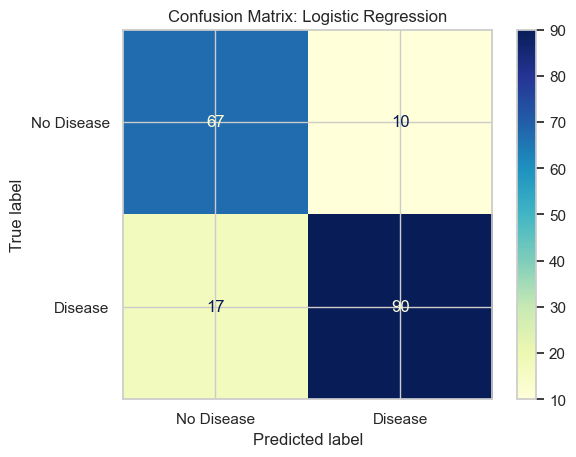

In [54]:
ConfusionMatrixDisplay(confusion_matrix=lr_results["Confusion Matrix"],display_labels=["No Disease", "Disease"]).plot(cmap="YlGnBu")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

Model 2: Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred_dt = dt.predict(X_test)

In [39]:
dt_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1 Score": f1_score(y_test, y_pred_dt),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_dt)
}

dt_results

{'Model': 'Decision Tree',
 'Accuracy': 0.8315217391304348,
 'Precision': 0.8584905660377359,
 'Recall': 0.8504672897196262,
 'F1 Score': 0.8544600938967136,
 'Confusion Matrix': array([[62, 15],
        [16, 91]])}

This block displays the confusion matrix for the decision tree model. It helps us see how many predictions were correct and how many were wrong, separating patients with and without heart disease.
We include it because it’s a visual tool that makes it easier to analyze the model’s performance.

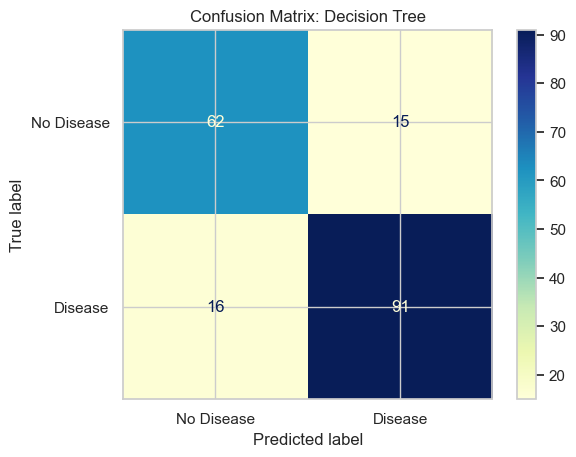

In [56]:
ConfusionMatrixDisplay(confusion_matrix=dt_results["Confusion Matrix"],display_labels=["No Disease", "Disease"]).plot(cmap="YlGnBu")
plt.title("Confusion Matrix: Decision Tree")
plt.show()


Model 3: Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf.predict(X_test)

In [44]:
rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf)
}

rf_results

{'Model': 'Random Forest',
 'Accuracy': 0.875,
 'Precision': 0.8962264150943396,
 'Recall': 0.8878504672897196,
 'F1 Score': 0.892018779342723,
 'Confusion Matrix': array([[66, 11],
        [12, 95]])}

This block shows the confusion matrix for the Random Forest model. It allows us to see how the model classified patients with and without heart disease, showing correct and incorrect predictions.
We include it because it’s a clear visual way to evaluate model performance.

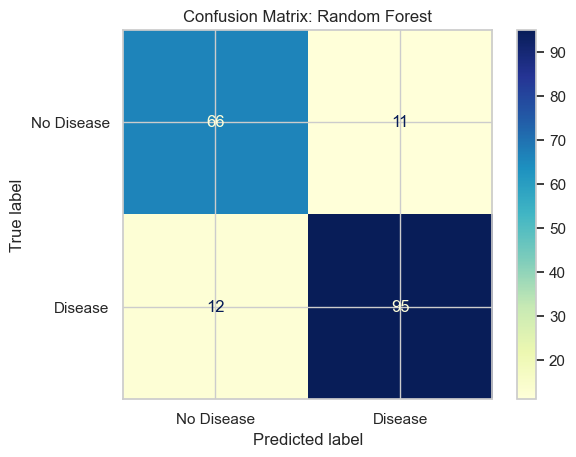

In [58]:
ConfusionMatrixDisplay(confusion_matrix=rf_results["Confusion Matrix"],display_labels=["No Disease", "Disease"]).plot(cmap="YlGnBu")
plt.title("Confusion Matrix: Random Forest")
plt.show()


We create a DataFrame called results_df that contains key results (precision, accuracy, etc.) from the three models: Logistic Regression, Decision Tree, and Random Forest.
Then, we drop the confusion matrix column to display only the most relevant metrics in a cleaner, comparative table.

In [45]:
results_df = pd.DataFrame([lr_results, dt_results, rf_results])
results_df.drop("Confusion Matrix", axis=1)


Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.853261   0.900000  0.841121  0.869565
1        Decision Tree  0.831522   0.858491  0.850467  0.854460
2        Random Forest  0.875000   0.896226  0.887850  0.892019